# Deep Learning for Vision

### Upside down detector: Train a model to detect if images are upside down

1. Pick a dataset of natural images (we suggest looking at datasets on the Hugging Face Hub)

2. Synthetically turn some of images upside down. Create a training and test set.

3. Build a neural network (using Tensorflow, PyTorch, or any framework you like)

4. Train it to classify image orientation until a reasonable accuracy is reached

5. Upload the the model to the Hugging Face Hub, and add a link to your model below.

6. Look at some of the images that were classified incorrectly. Please explain what you might do to improve your   
   model's performance on these images in the future (you do not need to implement these suggestions)

Submission instructions: Please write your code below and include some examples of images that were classified


Dataset: Scene Classification 

This dataset contains about ~25k images from a wide range of natural scenes from all around the world. 

1. Buildings
2. Forests
3. Mountains
4. Glacier
5. Street ~ 2.88 K
6. Sea




### Hugging face Cli

In [29]:
from huggingface_hub import notebook_login
# notebook_login()
# from huggingface_hub import push_to_hub_keras
# ! sudo apt -qq install git-lfs


### Prepare Dataset 

In [4]:
import pandas as pd
import cv2
import numpy as np
import os 
import shutil
#Progress
from tqdm import tqdm

#Dataset Path 
PATH = '/kaggle/input/scene-classification/train-scene classification/train/'



#Load image locations
Dataset = pd.read_csv("/kaggle/input/scene-classification/train-scene classification/train.csv")    # Dataframe
# Select streets from the enitre dataset 
Dataset = Dataset[Dataset["label"] == 5]
# D2 = Dataset[Dataset["label"] == 0]
# Dataset = pd.concat([D1,D2])
#Get list with file paths
im_name = Dataset["image_name"].tolist()
im_name = [PATH + s for s in im_name]

In [5]:
Dataset

,image_name,label
2,2.jpg,5
6,9.jpg,5
8,12.jpg,5
14,19.jpg,5
19,26.jpg,5
...,...,...
17007,24292.jpg,5
17012,24300.jpg,5
17021,24315.jpg,5
17022,24317.jpg,5


In [6]:
#Prepare Dataset 
!mkdir -p ./dataset/test/zero
!mkdir -p ./dataset/test/_180
!mkdir -p ./dataset/validation/zero
!mkdir -p ./dataset/validation/_180

In [7]:
check_dirs = "./dataset/test/_180"
#Flip and save images to respective dirs

#Check is operation has already been performed to avoid duplicates. 
if not any(os.scandir(check_dirs)):
    
    for index, path in  tqdm(zip(range(1,len(im_name)),im_name)):   
        #(index,file_path)
        im = cv2.imread(path)
#         print(im)


        if index< int(len(im_name))*0.6:

            if index%2:
                im = np.flipud(im)
                cv2.imwrite("./dataset/test/_180/{}.jpg".format(index),im)
            else: 
#                 shutil.copyfile(path, "./dataset/test/orignal/{}.jpg".format(index))
                cv2.imwrite("./dataset/test/zero/{}.jpg".format(index),im)

        else:

            if index%2:
                im = np.flipud(im)
                cv2.imwrite("./dataset/validation/_180/{}.jpg".format(index),im)
            else: 
#                 shutil.copyfile(path, "./dataset/validation/orignal/{}.jpg".format(index))
                cv2.imwrite("./dataset/validation/zero/{}.jpg".format(index),im)




2882it [00:19, 150.03it/s]


In [8]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf

train_dir = "./dataset/test"
validation_dir = "./dataset/validation"

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 1729 files belonging to 2 classes.


2022-04-04 19:56:39.165669: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-04 19:56:39.249342: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-04 19:56:39.250083: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-04 19:56:39.252315: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [9]:
train_dataset.class_names

['_180', 'zero']

In [10]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 1153 files belonging to 2 classes.


2022-04-04 19:56:41.886746: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


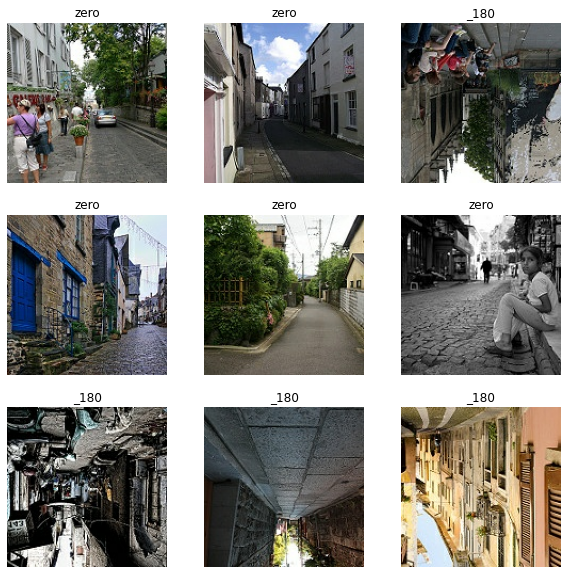

In [11]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [12]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [13]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 30
Number of test batches: 7


In [14]:
preprocess_input = tf.keras.applications.vgg16.preprocess_input

In [15]:
!git clone https://github.com/ozi-forks/Keras-VGG16-places365


Cloning into 'Keras-VGG16-places365'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 178 (delta 2), reused 0 (delta 0), pack-reused 172
Receiving objects: 100% (178/178), 449.22 KiB | 1.62 MiB/s, done.
Resolving deltas: 100% (92/92), done.


In [16]:
os.chdir("/kaggle/working/")

In [17]:
os.chdir("./Keras-VGG16-places365/")
from vgg16_hybrid_places_1365 import VGG16_Hybrid_1365
os.chdir("/kaggle/working/")

In [18]:
# base_model = VGG16_Hybrid_1365(weights='places', include_top=False)
# base_model.trainable = False

### Pretrained VGG16

In [19]:
IMG_SHAPE = IMG_SIZE + (3,)
from keras.applications.vgg16 import VGG16
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,include_top=False, weights='imagenet')
base_model.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [20]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [21]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

2022-04-04 19:56:46.128868: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


(32, 4, 4, 512)


In [22]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 512)


In [23]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [24]:
inputs = tf.keras.Input(shape=(150, 150, 3))
# x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [25]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 150, 150, 3)       0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 150, 150, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513   

In [27]:
initial_epochs = 25

loss0, accuracy0 = model.evaluate(validation_dataset)

30/30 [==============================] - 3s 42ms/step - loss: 3.4568 - accuracy: 0.4865


In [28]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 3.46
initial accuracy: 0.49


In [29]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/25
55/55 [==============================] - 4s 60ms/step - loss: 3.3390 - accuracy: 0.5263 - val_loss: 2.2245 - val_accuracy: 0.5490
Epoch 2/25
55/55 [==============================] - 3s 59ms/step - loss: 2.6892 - accuracy: 0.5622 - val_loss: 1.7099 - val_accuracy: 0.6308
Epoch 3/25
55/55 [==============================] - 3s 61ms/step - loss: 2.2678 - accuracy: 0.6270 - val_loss: 1.4324 - val_accuracy: 0.6803
Epoch 4/25
55/55 [==============================] - 3s 59ms/step - loss: 1.8786 - accuracy: 0.6530 - val_loss: 1.2112 - val_accuracy: 0.7169
Epoch 5/25
55/55 [==============================] - 4s 61ms/step - loss: 1.7410 - accuracy: 0.6744 - val_loss: 1.0642 - val_accuracy: 0.7610
Epoch 6/25
55/55 [==============================] - 3s 60ms/step - loss: 1.5128 - accuracy: 0.7073 - val_loss: 0.8948 - val_accuracy: 0.7912
Epoch 7/25
55/55 [==============================] - 3s 59ms/step - loss: 1.3138 - accuracy: 0.7420 - val_loss: 0.7947 - val_accuracy: 0.8095
Epoch 8/25
55

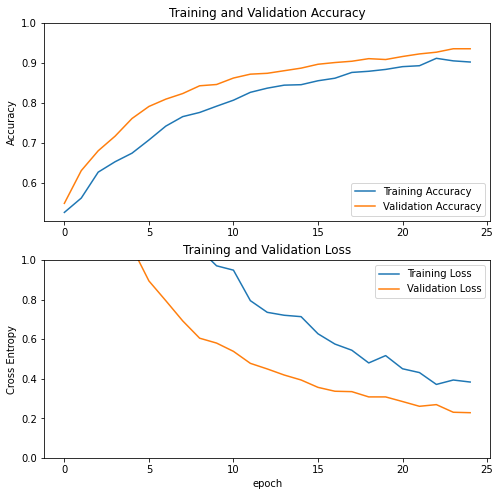

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [38]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

7/7 [==============================] - 0s 46ms/step - loss: 0.2705 - accuracy: 0.9330
Test accuracy : 0.9330357313156128


Predictions:
 [1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0]
Labels:
 [1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1]


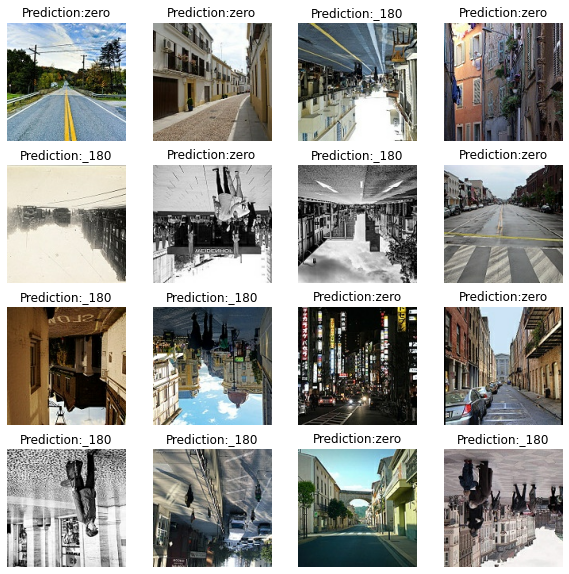

In [53]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title("Prediction:"+class_names[predictions[i]])
    plt.axis("off")

In [54]:
index = []
for i in range(len(label_batch)):
    if(predictions[i]!=label_batch[i]):
        index.append(i)
print(index)


[5, 18, 25, 31]


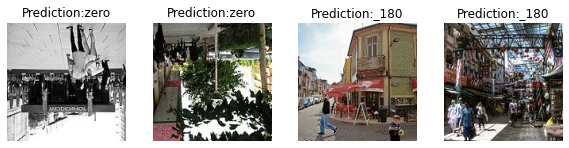

In [55]:

plt.figure(figsize=(10, 10))
for i, ind in zip(range(len(index)),index):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(image_batch[ind].astype("uint8"))
    plt.title("Prediction:"+class_names[predictions[ind]])
    plt.axis("off")

In [56]:
model.save('./model')
# push_to_hub_keras(model,'Upsidedown_street_classifier')

In [43]:
# !ls ./model

# Improvements 

- More data 
- fine tuning



- Will do more deatiled analysis 

# Hugging face model 

https://huggingface.co/Ozi/Upsidedown_street_classifier